In [ ]:
# /content/drive/MyDrive/Practice Notebook/Analyzing Product Sentiment/amazon_baby.csv

In [1]:
import numpy as np
import pandas as pd
import sklearn
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Practice Notebook/Analyzing Product Sentiment/amazon_baby.csv')
df.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [5]:
from nltk.tokenize import word_tokenize

def word_count(string):
  count = {}
  for word in word_tokenize(string.strip()):
    count[word] = count.get(word, 0) + 1
  return count

df['word_count'] = df['review'].map(word_count, na_action = 'ignore')

In [6]:
from collections import Counter
product_counter = Counter(df['name'].dropna().values)
product_counter.most_common(10)

[('Vulli Sophie the Giraffe Teether', 785),
 ('Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L', 562),
 ('Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision',
  561),
 ('Baby Einstein Take Along Tunes', 547),
 ('Cloud b Twilight Constellation Night Light, Turtle', 520),
 ('Fisher-Price Booster Seat, Blue/Green/Gray', 489),
 ('Fisher-Price Rainforest Jumperoo', 450),
 ('Graco Nautilus 3-in-1 Car Seat, Matrix', 419),
 ('Leachco Snoogle Total Body Pillow', 388),
 ('Regalo Easy Step Walk Thru Gate, White', 374)]

In [8]:
import matplotlib.pyplot as plt

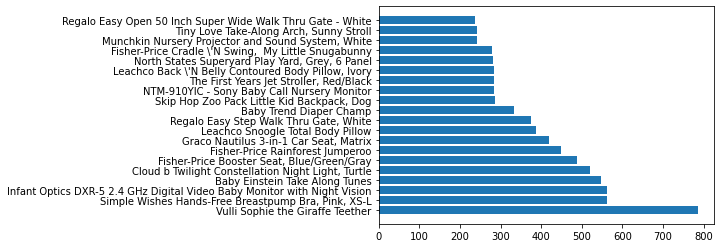

In [9]:
product_plotted = product_counter.most_common(20)
counter_pos = np.arange(len(product_plotted))
counter_labels, counts = zip(*product_plotted)
plt.barh(counter_pos, counts)
plt.yticks(counter_pos, counter_labels)
plt.show()

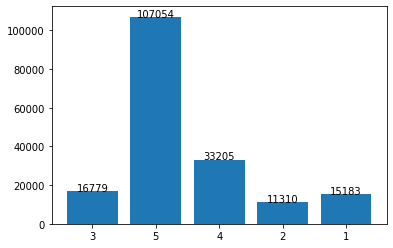

In [10]:
rating_counter = Counter(df['rating'].dropna().values)
counter_pos = np.arange(len(rating_counter))
counter_labels, counts = zip(*rating_counter.items())
plt.bar(counter_pos, counts)
plt.xticks(counter_pos, counter_labels)
for i, v in enumerate(counts):
  plt.text(x = i, y = v + 4.0, s = str(v), horizontalalignment = 'center')
plt.show()

In [11]:
girrafe_reviews = df[df['name'] == 'Vulli Sophie the Giraffe Teether']
girrafe_reviews.head()

,name,review,rating,word_count
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5,"{'He': 1, 'likes': 1, 'chewing': 1, 'on': 1, '..."
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5,"{'My': 1, 'son': 1, 'loves': 1, 'this': 1, 'to..."
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1,"{'There': 1, 'really': 1, 'should': 1, 'be': 1..."
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms\' group got Sophie for...,5,"{'All': 1, 'the': 2, 'moms': 1, 'in': 1, 'my':..."
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5,"{'I': 4, 'was': 2, 'a': 1, 'little': 1, 'skept..."


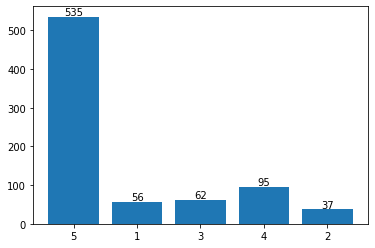

In [12]:
rating_counter = Counter(girrafe_reviews['rating'].dropna().values)
counter_pos = np.arange(len(rating_counter))
counter_labels, counts = zip(*rating_counter.items())
plt.bar(counter_pos, counts)
plt.xticks(counter_pos, counter_labels)
for i, v in enumerate(counts):
  plt.text(x = i, y = v + 4.0, s = str(v), horizontalalignment = 'center')
plt.show()

In [13]:
df = df.dropna(subset = ['rating', 'review'])
df = df[df['rating'] != 3]
df['sentiment'] = df['rating'] > 3
df.head()

,name,review,rating,word_count,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'it': 3, 'came': 1, 'early': 1, 'and': 3, 'wa...",True
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'Very': 1, 'soft': 1, 'and': 2, 'comfortable'...",True
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'This': 1, 'is': 4, 'a': 2, 'product': 2, 'we...",True
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'All': 1, 'of': 1, 'my': 1, 'kids': 2, 'have'...",True
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,"{'When': 1, 'the': 5, 'Binky': 3, 'Fairy': 3, ...",True


In [14]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 0)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = word_tokenize)
train_features = vectorizer.fit_transform(train['review'].values)
train_labels = train['sentiment'].astype(int).values
test_features = vectorizer.transform(test['review'].values)
test_labels = test['sentiment'].astype(int).values

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000).fit(train_features, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
print(model.predict_proba(test_features[:2]))
print(model.predict(test_features[:2]))

[[1.21924220e-04 9.99878076e-01]
 [9.99985885e-01 1.41153402e-05]]
[1 0]


Model score: 0.9350805844253652
FPR/TPR amount: 3326 3326


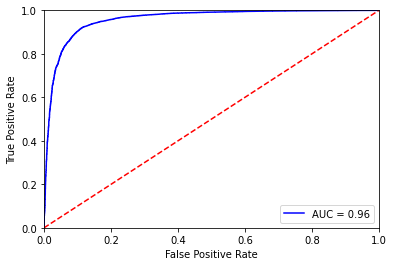

In [18]:
#sentiment_model.evaluate(test_data, metric='roc_curve')
from sklearn.metrics import roc_curve, roc_auc_score, auc
test_predictions = model.predict_proba(test_features)[:, 1]
fpr, tpr, threshold = roc_curve(test_labels, test_predictions)
roc_auc = auc(fpr, tpr)
print("Model score:", model.score(test_features, test_labels))
print("FPR/TPR amount:", len(fpr), len(tpr))

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [21]:
girrafe_reviews = girrafe_reviews.dropna(subset = ['review', 'rating'])
girrafe_reviews_features = vectorizer.transform(girrafe_reviews['review'])
girrafe_reviews['proba'] = model.predict_proba(girrafe_reviews_features)[:,1]
girrafe_reviews = girrafe_reviews.sort_values('proba', ascending = False)
girrafe_reviews.head()

,name,review,rating,word_count,proba
34892,Vulli Sophie the Giraffe Teether,"Sophie, oh Sophie, your time has come. My gran...",5,"{'Sophie': 17, ',': 8, 'oh': 1, 'your': 1, 'ti...",1.0
34434,Vulli Sophie the Giraffe Teether,My Mom-in-Law bought Sophie for my son when he...,5,"{'My': 1, 'Mom-in-Law': 1, 'bought': 1, 'Sophi...",1.0
34515,Vulli Sophie the Giraffe Teether,"As every mom knows, you always want to give yo...",5,"{'As': 1, 'every': 1, 'mom': 1, 'knows': 1, ',...",1.0
34442,Vulli Sophie the Giraffe Teether,"Yes, it\'s imported. Yes, it\'s expensive. And...",5,"{'Yes': 2, ',': 14, 'it\': 4, ''s': 6, 'import...",1.0
34746,Vulli Sophie the Giraffe Teether,Sophie the Giraffe is the perfect teething toy...,5,"{'Sophie': 5, 'the': 6, 'Giraffe': 1, 'is': 7,...",1.0
